<a href="https://colab.research.google.com/github/pmoskovi/google-colab/blob/master/FindQueen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading files from the local file system

This script allows you to select and upload files from your local file system. This is what I use to upload my training files.

In [0]:
!rm train/*
!rm test/*

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
!mkdir train
!mkdir test
!mv im-0*.jpg train
!mv im-5*.jpg train
!mv im-1*.jpg test
!mv im-6*.jpg test

In [0]:
!ls -la train

In [0]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import pickle

In [0]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

In [0]:
train_image_file_names = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)][0:100] 
test_image_file_names = [TEST_DIR+i for i in os.listdir(TEST_DIR)][0:100]

In [0]:
train_image_file_names

In [89]:
test_image_file_names

['test/im-60.jpg', 'test/im-10.jpg', 'test/im-11.jpg']

In [0]:
# Slow, yet simple implementation with tensorflow
# could be rewritten to be much faster
# (which is not really needed as it takes less than 5 minutes on my laptop)
def decode_image(image_file_names, resize_func=None):
    
    images = []
    
    graph = tf.Graph()
    with graph.as_default():
        file_name = tf.placeholder(dtype=tf.string)
        file = tf.read_file(file_name)
        image = tf.image.decode_jpeg(file)
        if resize_func != None:
            image = resize_func(image)
    
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()   
        for i in range(len(image_file_names)):
            images.append(session.run(image, feed_dict={file_name: image_file_names[i]}))
            if (i+1) % 1000 == 0:
                print('Images processed: ',i+1)
        
        session.close()
    
    return images

In [0]:
train_images = decode_image(train_image_file_names)
test_images = decode_image(test_image_file_names)
all_images = train_images + test_images

In [0]:
# Check mean aspect ratio (width/height), mean width and mean height
width = []
height = []
aspect_ratio = []
for image in all_images:
    h, w, d = np.shape(image)
    aspect_ratio.append(float(w) / float(h))
    width.append(w)
    height.append(h)

Mean aspect ratio:  1.0092055915444937


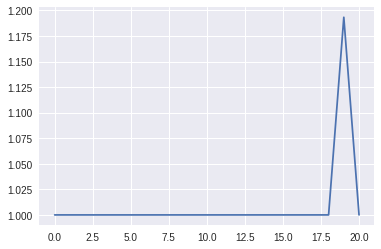

In [93]:
print('Mean aspect ratio: ',np.mean(aspect_ratio))
plt.plot(aspect_ratio)
plt.show()

Mean width: 500.0
Mean height: 496.14285714285717


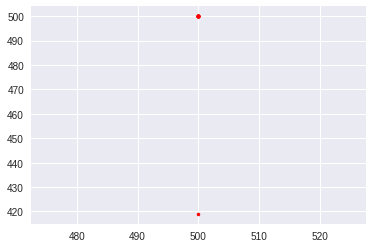

In [94]:
print('Mean width:',np.mean(width))
print('Mean height:',np.mean(height))
plt.plot(width, height, '.r')
plt.show()

In [0]:
WIDTH=500
HEIGHT=500
resize_func = lambda image: tf.image.resize_image_with_crop_or_pad(image, HEIGHT, WIDTH)

In [0]:
processed_train_images = decode_image(train_image_file_names, resize_func=resize_func)
processed_test_images = decode_image(test_image_file_names, resize_func=resize_func)

In [0]:
# Let's check how the images look like
for i in range(3):
    plt.imshow(processed_train_images[i])
    plt.show()

In [0]:
processed_train_images[1]
                     